In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# from feature_importance import *
from helper import *
import function as F
from airbnbclass import *

In [3]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('ggplot')

%matplotlib inline

In [4]:
pd.set_option("display.max_colwidth",200)
pd.set_option("display.max_rows",999)
pd.set_option("display.max_columns",999)

## Load Data

In [5]:
columns = ['id','price','availability_30','availability_60','reviews_per_month',
'number_of_reviews','last_review','host_since','minimum_nights',
'room_type','host_response_time', 'host_is_superhost',
'review_scores_rating','property_type', 
'neighbourhood_cleansed','bedrooms',
'calculated_host_listings_count','host_identity_verified',
'cleaning_fee','last_scraped','latitude','longitude','beds',
'cancellation_policy','access','description','notes','transit',
'instant_bookable','extra_people','maximum_nights','house_rules',
#            'calendar_updated',
]

In [32]:
sf = Airbnb()

In [33]:
listings = sf.load_data(columns_used=columns)

Reading: /Users/Alex/Documents/10_galvanize/galvanize/capstone/dsi-project-proposals/project/data/listings20170802.csv...
reviews20170802.csv
(13831, 37)
Reading: /Users/Alex/Documents/10_galvanize/galvanize/capstone/dsi-project-proposals/project/data/listings20180110.csv...
reviews20180110.csv
(20337, 37)
Reading: /Users/Alex/Documents/10_galvanize/galvanize/capstone/dsi-project-proposals/project/data/listings20180304.csv...
reviews20180304.csv
(25141, 37)
Reading: /Users/Alex/Documents/10_galvanize/galvanize/capstone/dsi-project-proposals/project/data/listings20171101.csv...
reviews20171101.csv
(34070, 37)
Reading: /Users/Alex/Documents/10_galvanize/galvanize/capstone/dsi-project-proposals/project/data/listings20180202.csv...
reviews20180202.csv
(38797, 37)
Reading: /Users/Alex/Documents/10_galvanize/galvanize/capstone/dsi-project-proposals/project/data/listings20180406.csv...
reviews20180406.csv
(43641, 37)
Reading: /Users/Alex/Documents/10_galvanize/galvanize/capstone/dsi-project-p

In [34]:
listings = sf.clean_data(listings)

In [35]:
listings = sf.filter_data(listings)

Filter 1: 9032, i.e. 10.54% listings removed.

FIlter 2 : 12879, i.e.15.03% listings removed.

23472 of listings to check
Remove 22716 listings. 96.78% of listings checked.  

2432 of listings to check
Remove 1926 listings. 79.19% of listings checked.  

2461 of listings to check
Remove 1676 listings. 68.10% of listings checked.  

2469 of listings to check
Remove 1531 listings. 62.01% of listings checked.  

2451 of listings to check
Remove 1566 listings. 63.89% of listings checked.  

2262 of listings to check
Remove 1194 listings. 52.79% of listings checked.  

2150 of listings to check
Remove 1029 listings. 47.86% of listings checked.  

1960 of listings to check
Remove 921 listings. 46.99% of listings checked.  

1947 of listings to check
Remove 828 listings. 42.53% of listings checked.  

1664 of listings to check
Remove 512 listings. 30.77% of listings checked.  

1570 of listings to check
Remove 499 listings. 31.78% of listings checked.  

1404 of listings to check
Remove 310 l

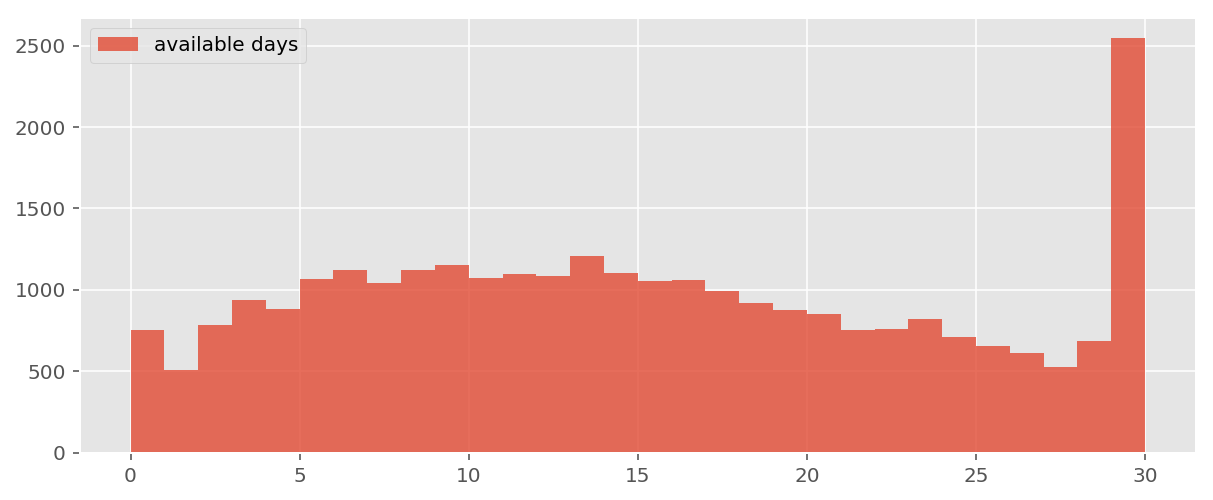

In [36]:
fig, ax1 = plt.subplots(1,1,figsize=(10,4))
ax1.hist(listings.availability_30.values, bins=30, label='available days',alpha=.8)
ax1.legend();

In [37]:
listings = sf.feature_engineer(listings)

In [38]:
# listings = listings.reset_index()

In [39]:
# listings, sf.notes = sf.train_text_topic_weight(listings, 'notes', 5)
# listings, sf.transit = sf.train_text_topic_weight(listings, 'transit', 5)

In [40]:
X_train, X_test, y_train, y_test = sf.my_train_test_split(listings, 0.7)

In [41]:
rf = RandomForestRegressor(n_estimators=50)

In [42]:
sf.train_model(rf,X_train,y_train)

In [43]:
sf.evaluate_model(X_test,y_test, f_importance=True)

5.2742866941
0.416194907314


`5.28651528879
0.403916071711`

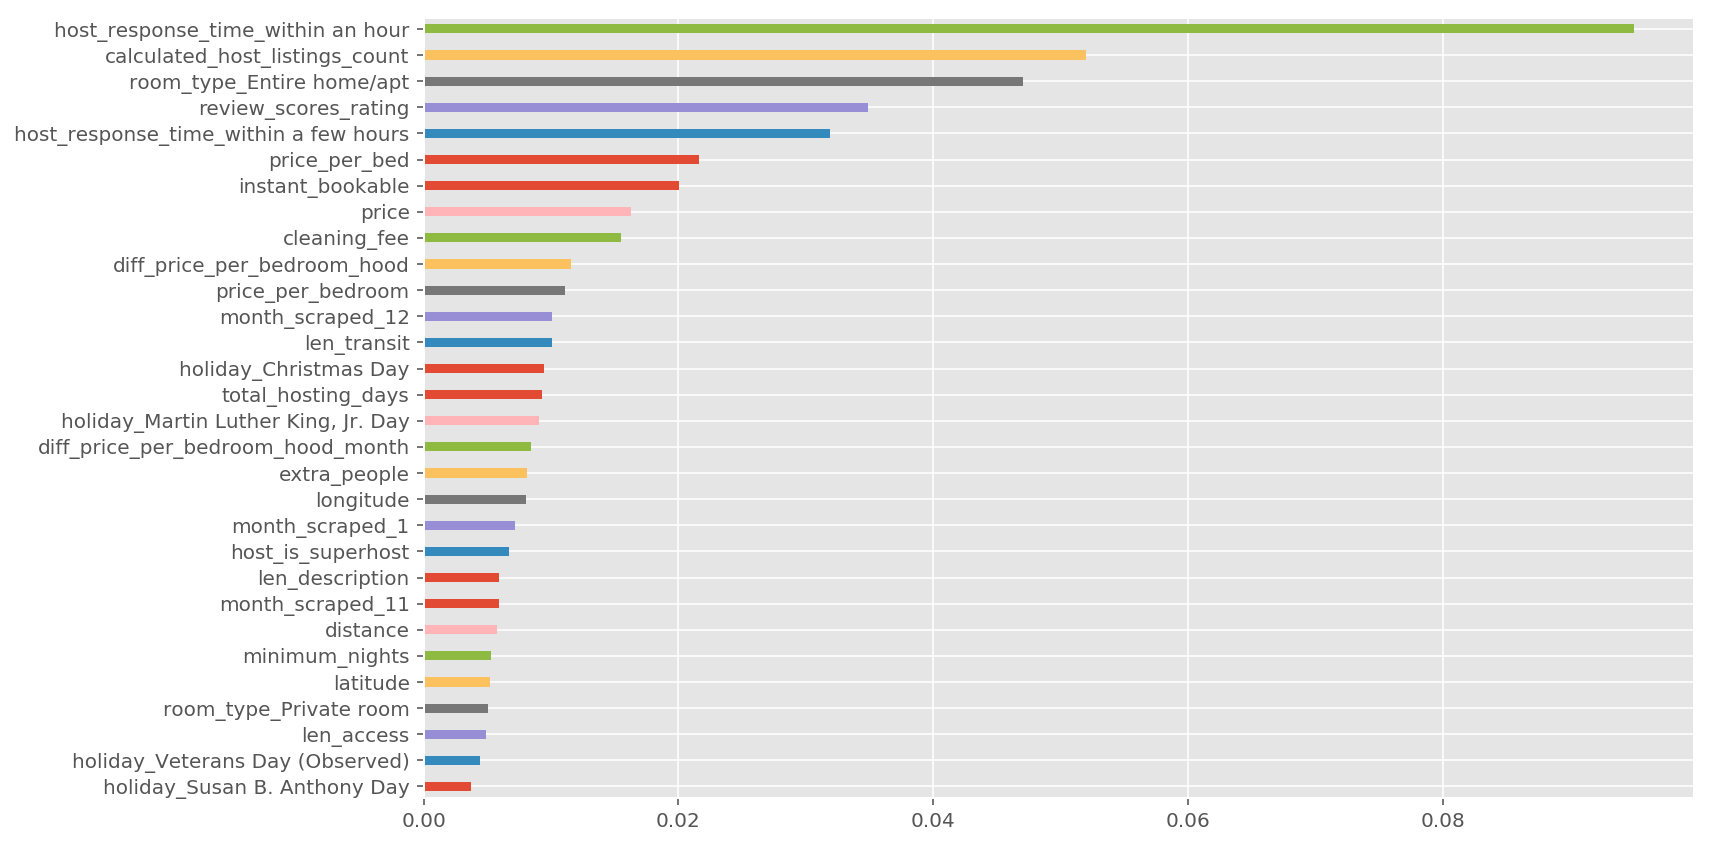

In [44]:
# fd = pd.Series(sf.feature_importance,index=sf.X_train_last.columns)
F.plot_feature_importance(sf.feature_importance,show_n=30)

In [45]:
sf.feature_importance.sort_values(ascending=False)

host_response_time_within an hour                  9.501505e-02
calculated_host_listings_count                     5.202767e-02
room_type_Entire home/apt                          4.704356e-02
review_scores_rating                               3.489566e-02
host_response_time_within a few hours              3.192694e-02
price_per_bed                                      2.162296e-02
instant_bookable                                   2.002655e-02
price                                              1.630639e-02
cleaning_fee                                       1.552878e-02
diff_price_per_bedroom_hood                        1.155758e-02
price_per_bedroom                                  1.110321e-02
month_scraped_12                                   1.008641e-02
len_transit                                        1.006380e-02
holiday_Christmas Day                              9.426404e-03
total_hosting_days                                 9.305400e-03
holiday_Martin Luther King, Jr. Day     

In [ ]:
sf.X_test_last.head()

In [ ]:
listings_used['Occupancy_level_1st_month'] = pd.cut(listings_used.availability_30,
                                           bins=[0,10,20,31],labels=['low','medium','high'], right=False)
df_low = listings_used[listings_used['Occupancy_level_1st_month'] == 'low']
df_medium = listings_used[listings_used['Occupancy_level_1st_month'] == 'medium']
df_high = listings_used[listings_used['Occupancy_level_1st_month'] == 'high']

In [ ]:
def create_data_source(data_frame):
    return ColumnDataSource(
        data=dict(
        price = data_frame['price'],
        bedrooms=data_frame['bedrooms'],
        room_type=data_frame['room_type'],
        property_type=data_frame['property_type'],
        neighbourhood_cleansed=data_frame['neighbourhood_cleansed'],
        availability_30 = data_frame['availability_30'],
        lat=data_frame['latitude'],
        lon=data_frame['longitude'],
        ))

In [ ]:
from bokeh.plotting import ColumnDataSource,output_file, gmap
from bokeh.models import (HoverTool,GMapPlot,GMapOptions,glyphs)
from bokeh.io import show, output_notebook
output_notebook()

In [ ]:
map_options = GMapOptions(lat=37.762835, lng=-122.434239, map_type="roadmap", zoom=12)
plot = gmap("keys", map_options,
            title="Next 30 days availability: Blue - Low | Magenta - Medium | Red - High ")
for df, color in zip([df_low, df_medium, df_high], ['blue','green','red']):
    source = create_data_source(df)
    circle_m = glyphs.Circle(x="lon", y="lat",size=3, line_color=color, fill_color=color,line_alpha=0.1, fill_alpha=0.1)
    cpm = plot.add_glyph(source,circle_m)

plot.add_tools(HoverTool(tooltips = [('price', '@price'),
                                     ('bedrooms','@bedrooms'),
                                     ('room_type','@room_type'),
                                     ('property_type','@property_type'),
                                     ('neighbourhood_cleansed','@neighbourhood_cleansed'),
                                     ('availability 30 days','@availability_30'),
                                     ]))
show(plot)

In [ ]:
listings.head(1)

In [ ]:
listings_used.shape

In [ ]:
listings_final = listings_used.copy()
listings_final = listings_final.reset_index()

In [ ]:
# Clean price label: remove the dollar sign and comma.
listings_final.price=listings_final.price.str.replace(r'[$,]','').astype(float)
listings_final.cleaning_fee=listings_final.cleaning_fee.str.replace(r'[$,]','').astype(float)
listings_final.extra_people=listings_final.extra_people.str.replace(r'[$,]','').astype(float)

In [ ]:
# Convert 0 bed and 0 bedrooms to 1.
listings_final.loc[listings_final['bedrooms']==0,'bedrooms'] = 1
listings_final.loc[listings_final['beds']==0,'beds'] = 1

In [ ]:
# transform t/f column to 1 and 0
columns_t_f = ['host_is_superhost','instant_bookable',
               'host_identity_verified',
               'require_guest_phone_verification']
listings_final[columns_t_f] = listings_final[columns_t_f].replace({'f':0,'t':1})

In [ ]:
# deal with nan
listings_final.bedrooms = listings_final.bedrooms.fillna(1)
listings_final.cleaning_fee = listings_final.cleaning_fee.fillna(0)
listings_final.reviews_per_month = listings_final.reviews_per_month.fillna(0)
listings_final.review_scores_rating = listings_final.review_scores_rating.fillna(0)
listings_final.beds = listings_final.beds.fillna(1)
listings_final.host_response_time = listings_final.host_response_time.fillna('unclear')
listings_final.host_is_superhost = listings_final.host_is_superhost.fillna(0)
listings_final.host_identity_verified = listings_final.host_identity_verified.fillna(0)

In [ ]:
# Feature engineering - month, year
listings_final['month_scraped'] =  listings_final['last_scraped'].dt.month.astype(str)
listings_final['year_scraped'] =  listings_final['last_scraped'].dt.year.astype(str)

In [ ]:
# Feature engineering - total_hosting_days, price_per_bedroom, price_per_bed
listings_final['total_hosting_days']=listings_final['last_scraped'] - listings_final['host_since']
listings_final['total_hosting_days']=listings_final['total_hosting_days'].apply(lambda row: row.days)
listings_final.total_hosting_days = listings_final.total_hosting_days.fillna(0)
listings_final['price_per_bedroom']=listings_final['price']/listings_final['bedrooms']
listings_final['price_per_bed']=listings_final['price']/listings_final['beds']

In [ ]:
# Feature engineering - Add the number of words of house rules, access, transit, description
# len_house_rules, len_access, len_transit, len_description
listings_final['len_house_rules'] = listings_final['house_rules'].astype(str).apply(lambda x: len(x.split(' ')))
listings_final['len_description'] = listings_final['description'].astype(str).apply(lambda x: len(x.split(' ')))
listings_final['len_access'] = listings_final['access'].astype(str).apply(lambda x: len(x.split(' ')))
listings_final['len_transit'] = listings_final['transit'].astype(str).apply(lambda x: len(x.split(' ')))

In [ ]:
# Feature engineering - Check if the predicted month includes any national holidays, add the name of the holiday if so.
holidays = pd.read_csv('holidays.csv', header=None)
holidays.columns=['date','holidays']
holidays.date = pd.to_datetime(holidays.date)

listings_final['holiday'] = listings_final['last_scraped'].apply(
    lambda x: F.add_holidays(x, holidays))

In [ ]:
X_train, X_test, y_train, y_test = F.my_train_test_split(listings_final, 0.7)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

In [ ]:
#Feature engineering - price_per_bedroom subtract its neighbourhood mean
price_per_bedroom = F.PricePerBedroom()
price_per_bedroom.fit(X_train)
X_train = price_per_bedroom.transform(X_train)
X_test = price_per_bedroom.transform(X_test)

In [ ]:
X_train.drop(['last_review','Occupancy_level_1st_month',
                     'availability_60','last30','last60', 'last90',
                     'last120','last180','last_scraped','host_since','number_of_reviews',
                     'reviews_per_month','notes','access','index',
                     'house_rules','description','transit'], axis=1, inplace=True)
X_test.drop(['last_review','Occupancy_level_1st_month',
                     'availability_60','last30','last60', 'last90',
                     'last120','last180','last_scraped','host_since','number_of_reviews',
                     'reviews_per_month','notes','access','index',
                     'house_rules','description','transit'], axis=1, inplace=True)

In [ ]:
report_nan(X_train).iloc[:5,:]

In [ ]:
def build_text_vectorizer(contents, use_tfidf=True, use_stemmer=False, max_features=None):
    '''
    Build and return a **callable** for transforming text documents to vectors,
    as well as a vocabulary to map document-vector indices to words from the
    corpus. The vectorizer will be trained from the text documents in the
    `contents` argument. If `use_tfidf` is True, then the vectorizer will use
    the Tf-Idf algorithm, otherwise a Bag-of-Words vectorizer will be used.
    The text will be tokenized by words, and each word will be stemmed if
    `use_stemmer` is True. If `max_features` is not None, then the vocabulary
    will be limited to the `max_features` most common words in the corpus.
    '''
    Vectorizer = TfidfVectorizer if use_tfidf else CountVectorizer
    tokenizer = RegexpTokenizer(r"[\w']+")
    stem = PorterStemmer().stem if use_stemmer else (lambda x: x)
    stop_set = set(stopwords.words('english'))

    # Closure over the tokenizer et al.
    def tokenize(text):
        tokens = tokenizer.tokenize(text)
        stems = [stem(token) for token in tokens if token not in stop_set]
        return stems

    vectorizer_model = Vectorizer(tokenizer=tokenize, max_features=max_features)
    vectorizer_model.fit(contents)
    vocabulary = np.array(vectorizer_model.get_feature_names())

    # Closure over the vectorizer_model's transform method.
    def vectorizer(X):
        return vectorizer_model.transform(X).toarray()

    return vectorizer, vocabulary


In [ ]:
def hand_label_topics(H, vocabulary, prob_w, series):
    '''
    Print the most influential words of each latent topic, and prompt the user
    to label each topic. The user should use their humanness to figure out what
    each latent topic is capturing.
    '''
    hand_labels = []
    for i, row in enumerate(H):
        idx = np.argsort(prob_w[:,i])[::-1][:3]
        for k in idx:
            print('Example id:{}: {}'.format(k, series[k]))   
        print()
        top_five = np.argsort(row)[::-1][:20]
        print('topic', i)
        print('-->', ' '.join(vocabulary[top_five]))
        label = input('please label this topic: ')
        hand_labels.append(label)
        print()
    return hand_labels

In [ ]:
# def analyze_article(index, series, W, hand_labels):
#     '''
#     Print an analysis of a single NYT articles, including the article text
#     and a summary of which topics it represents. The topics are identified
#     via the hand-labels which were assigned by the user.
#     '''
#     print(series[index])
#     probs = softmax(W[index], temperature=0.01)
#     for prob, label in zip(probs, hand_labels):
#         print('--> {:.2f}% {}'.format(prob * 100, label))
#     print()

In [ ]:
def softmax(v, temperature=1.0):
    '''
    A heuristic to convert arbitrary positive values into probabilities.
    See: https://en.wikipedia.org/wiki/Softmax_function
    '''
    expv = np.exp(v / temperature)
    print(expv.shape)
    s = np.sum(expv, axis=1)
    print(s.shape)
    return expv / s[:,None]

In [ ]:
def deal_text_features(series, n_components):
    series = listings_final.notes.fillna('unknown')
    vectorizer, vocabulary = build_text_vectorizer(series,
                                 use_tfidf=True,
                                 use_stemmer=True,
                                 max_features=None)
    X = vectorizer(series)
    nmf = NMF_sklearn(n_components=n_components, max_iter=100, alpha=0.0)
    W = nmf.fit_transform(X)
    H = nmf.components_
    prob_w = softmax(W, temperature=0.01)
    hand_labels = hand_label_topics(H, vocabulary, prob_w, series)
    return pd.DataFrame(W,columns=[hand_labels])

In [ ]:
class text:
    def __init__(self, series, n_components):
        
        self.series = series.copy()
        
    

In [ ]:
df_notes.iloc[:,2].max()

In [ ]:
df_notes.iloc[np.argsort(df_notes.iloc[:,2])[:-10:-1],2]

In [ ]:
softmax(df_notes.values, temperature=0.01)

In [ ]:
df_notes = deal_text_features(sf.cleaned_data.notes.sample(100), 5)

In [ ]:
listings_final.shape

In [ ]:
df_notes.head()

In [ ]:
temp = listings_final.reset_index()

In [ ]:
listings_final = pd.concat([temp,df_notes], axis=1)

In [ ]:
listings_final.shape

In [ ]:
listings_final.head(1)

In [ ]:
listings_final.drop(['last_review','Occupancy_level_1st_month',
                     'availability_60','last30','last60', 'last90',
                     'last120','last180','last_scraped','host_since','number_of_reviews',
                     'reviews_per_month','notes','access','index',
                     'house_rules','description','transit'], axis=1, inplace=True)

In [ ]:
report_nan(listings_final).iloc[:10,:]

In [ ]:
listings_final.dropna(inplace=True)

In [ ]:
report_nan(listings_final).iloc[:10,:]

In [ ]:
# dummify categorical variables
listings_final = pd.get_dummies(listings_final)

In [ ]:
# Creat label
# y = listings_final.pop('availability_30')

In [ ]:
X_train, X_test, y_train, y_test = my_train_test_split(listings_final, 0.6)

In [ ]:
X_train.head()

In [ ]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
# from sklearn.model_selection import cross_val_score

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
m = rf.fit(X_train,np.log(y_train+1))
y_pred = np.clip(np.exp(m.predict(X_test))-1, 0, 30)

In [ ]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

In [ ]:
rf = RandomForestRegressor(n_estimators=50)
m = rf.fit(X_train,y_train)
y_pred = np.clip(np.round(m.predict(X_test)), 0, 30)

In [ ]:
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_log_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

`4.41679890234
0.200529915513
32.0959029175`

`4.35370179654
0.21774572576
30.2024259069`

In [ ]:
plt.scatter(y_test, abs(y_pred-y_test), alpha=0.05)

In [ ]:
result = pd.DataFrame(y_pred, y_test).reset_index()
result.columns=['y_test','y_pred']
result = result.sort_values(by='y_test')
result.head(50)

In [ ]:
result.corr()

In [ ]:
X = listings_final.copy()
y = X.pop('availability_30')

In [ ]:
neg_mae = lambda y1, y2: -mean_squared_log_error(y1, y2)
feature_importance = plot_myRf_feature_importance(X.values, y.values,scorer=neg_mae,
                                                   col_names=X.columns.tolist(),n_trees=50, show_n=30);

In [ ]:
feature_importance.iloc[:]

In [ ]:
X.shape

In [ ]:
df_corr = X.corr()

In [ ]:
show_corr('price_per_bedroom', df_corr, X, nb=10)

In [ ]:
X.head()